# Tutorial-XClone on BCH869 scRNA-seq

scRNA-seq data

Author: Rongting Huang


Date: 2022-11-17

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xclone
xclone.__version__

import pandas as pd
import numpy as np
import scipy
scipy.__version__

import anndata as an

xclone.pp.efficiency_preview()

import warnings
warnings.filterwarnings('ignore')

'0.3.1'

'1.7.0'

[XClone efficiency] multiprocessing cpu total count in your device 112


## load dataset

In [3]:
RDR_adata = xclone.data.bch869_rdr()

In [4]:
BAF_adata = xclone.data.bch869_baf()

## RDR module

[XClone RDR module running]************************
[XClone data preprocessing] check RDR raw dataset value: success
Keep valid cells: Filter out 0 cells / 492 total cells, remain 492 valid cells with annotation
[XClone data preprocessing] check RDR cell annotation: success
[XClone-RDR preprocessing] Filter out 12150 genes / 32696 total genes, remain 20546 genes
[XClone data preprocessing] detect RDR genes: done
[XClone-RDR preprocessing] Filter out 15108 genes / 20546 total genes, remain 5438 genes


Trying to set attribute `.var` of view, copying.


[XClone] use marker genes provided by users: 
 ['AC020594.5' 'AFF3' 'AHCY' 'ALCAM' 'APOD' 'ASTN2' 'ATF3' 'ATL3' 'ATP1B1'
 'ATP2B1' 'B2M' 'C15orf38' 'C7orf55-LUC7L2' 'CDK2AP1' 'CLU' 'CNTD1'
 'CNTN5' 'CTD-2370N5.3' 'CTTNBP2' 'DAAM2' 'DBI' 'DCC' 'DOCK3' 'EEPD1'
 'EGR2' 'ELL2' 'ENPP2' 'EPHA7' 'ERBB3' 'ERBB4' 'ERCC1' 'EVI2A' 'FOSB'
 'FOXN3' 'FSTL5' 'GALNT13' 'GLCCI1' 'GLUD1' 'GPM6B' 'GSN' 'GSN-AS1'
 'HLA-B' 'HLA-C' 'ITPKB' 'JAZF1' 'JUNB' 'KIF1A' 'LPCAT2' 'LPPR1' 'LRP1B'
 'LRRK2' 'LUC7L2' 'MACROD1' 'MAP2' 'MOCS1' 'NINJ2' 'NKAIN2' 'NTM' 'PARD3B'
 'PCDH9' 'PFKFB3' 'PILRB' 'PLD1' 'PLEKHB1' 'PLXDC2' 'PLXNB1' 'PRKG1'
 'PROX1' 'PTPRN2' 'PTPRS' 'RAPGEF3' 'RHOB' 'RP11-108K3.1' 'RP11-218M22.1'
 'RP11-477J21.6' 'RP11-603J24.9' 'RP4-777D9.2' 'RP5-872K7.7' 'RPS18'
 'SEMA6D' 'SERP1' 'SFMBT2' 'SGCD' 'SIRT2' 'SLC31A2' 'SOX10' 'SPARC' 'SPP1'
 'SRI' 'ST3GAL6' 'SYNGR2' 'TENC1' 'TENM4' 'TLR1' 'TNFAIP8L3' 'TSPAN15'
 'TSPO' 'UPK3B' 'ZFAS1' 'ZNF429']
filter_genes_num: 100
used_genes_num: 5338
output anndata is no

Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.


[XClone RDR gene dispersion fitting] Time used: 22 seconds
[XClone RDR gene-specific dispersion]: checking
max_value: 6.562489264291456
min_value: 2.515314515478787e-08
qt_0.95_value: 4.02098279579869
qt_0.05_value: 1.3111472327566508e-06
remove no GLM results genes num: 0
remove inf dispersion genes num: 0
[XClone RDR library ratio]: clipping
[XClone RDR gene-specific dispersion]: checking
max_value: 1.3092918637056228
min_value: 8.177894568161771e-07
qt_0.95_value: 1.3092918637056228
qt_0.05_value: 1.3111472327566508e-06
[XClone] RDR CNV states chrs guiding(copy loss, copy neutral, copy gain): ['14q', '6p', '1q']
CNV loss:  0.5506994687515037
CNV neutral:  1.017414751554808
CNV gain:  1.634510067300665
[XClone] RDR CNV states ratio guiding(copy loss, copy neutral, copy gain): [0.55069947 1.01741475 1.63451007]
expression_brk [0.6931472 2.036882 ]
[XClone] CNV_optimazation iteration:  1
filter nan emm_prob
[XClone HMM smoothing] Time used: 5 seconds
[XClone] CNV_optimazation iteration

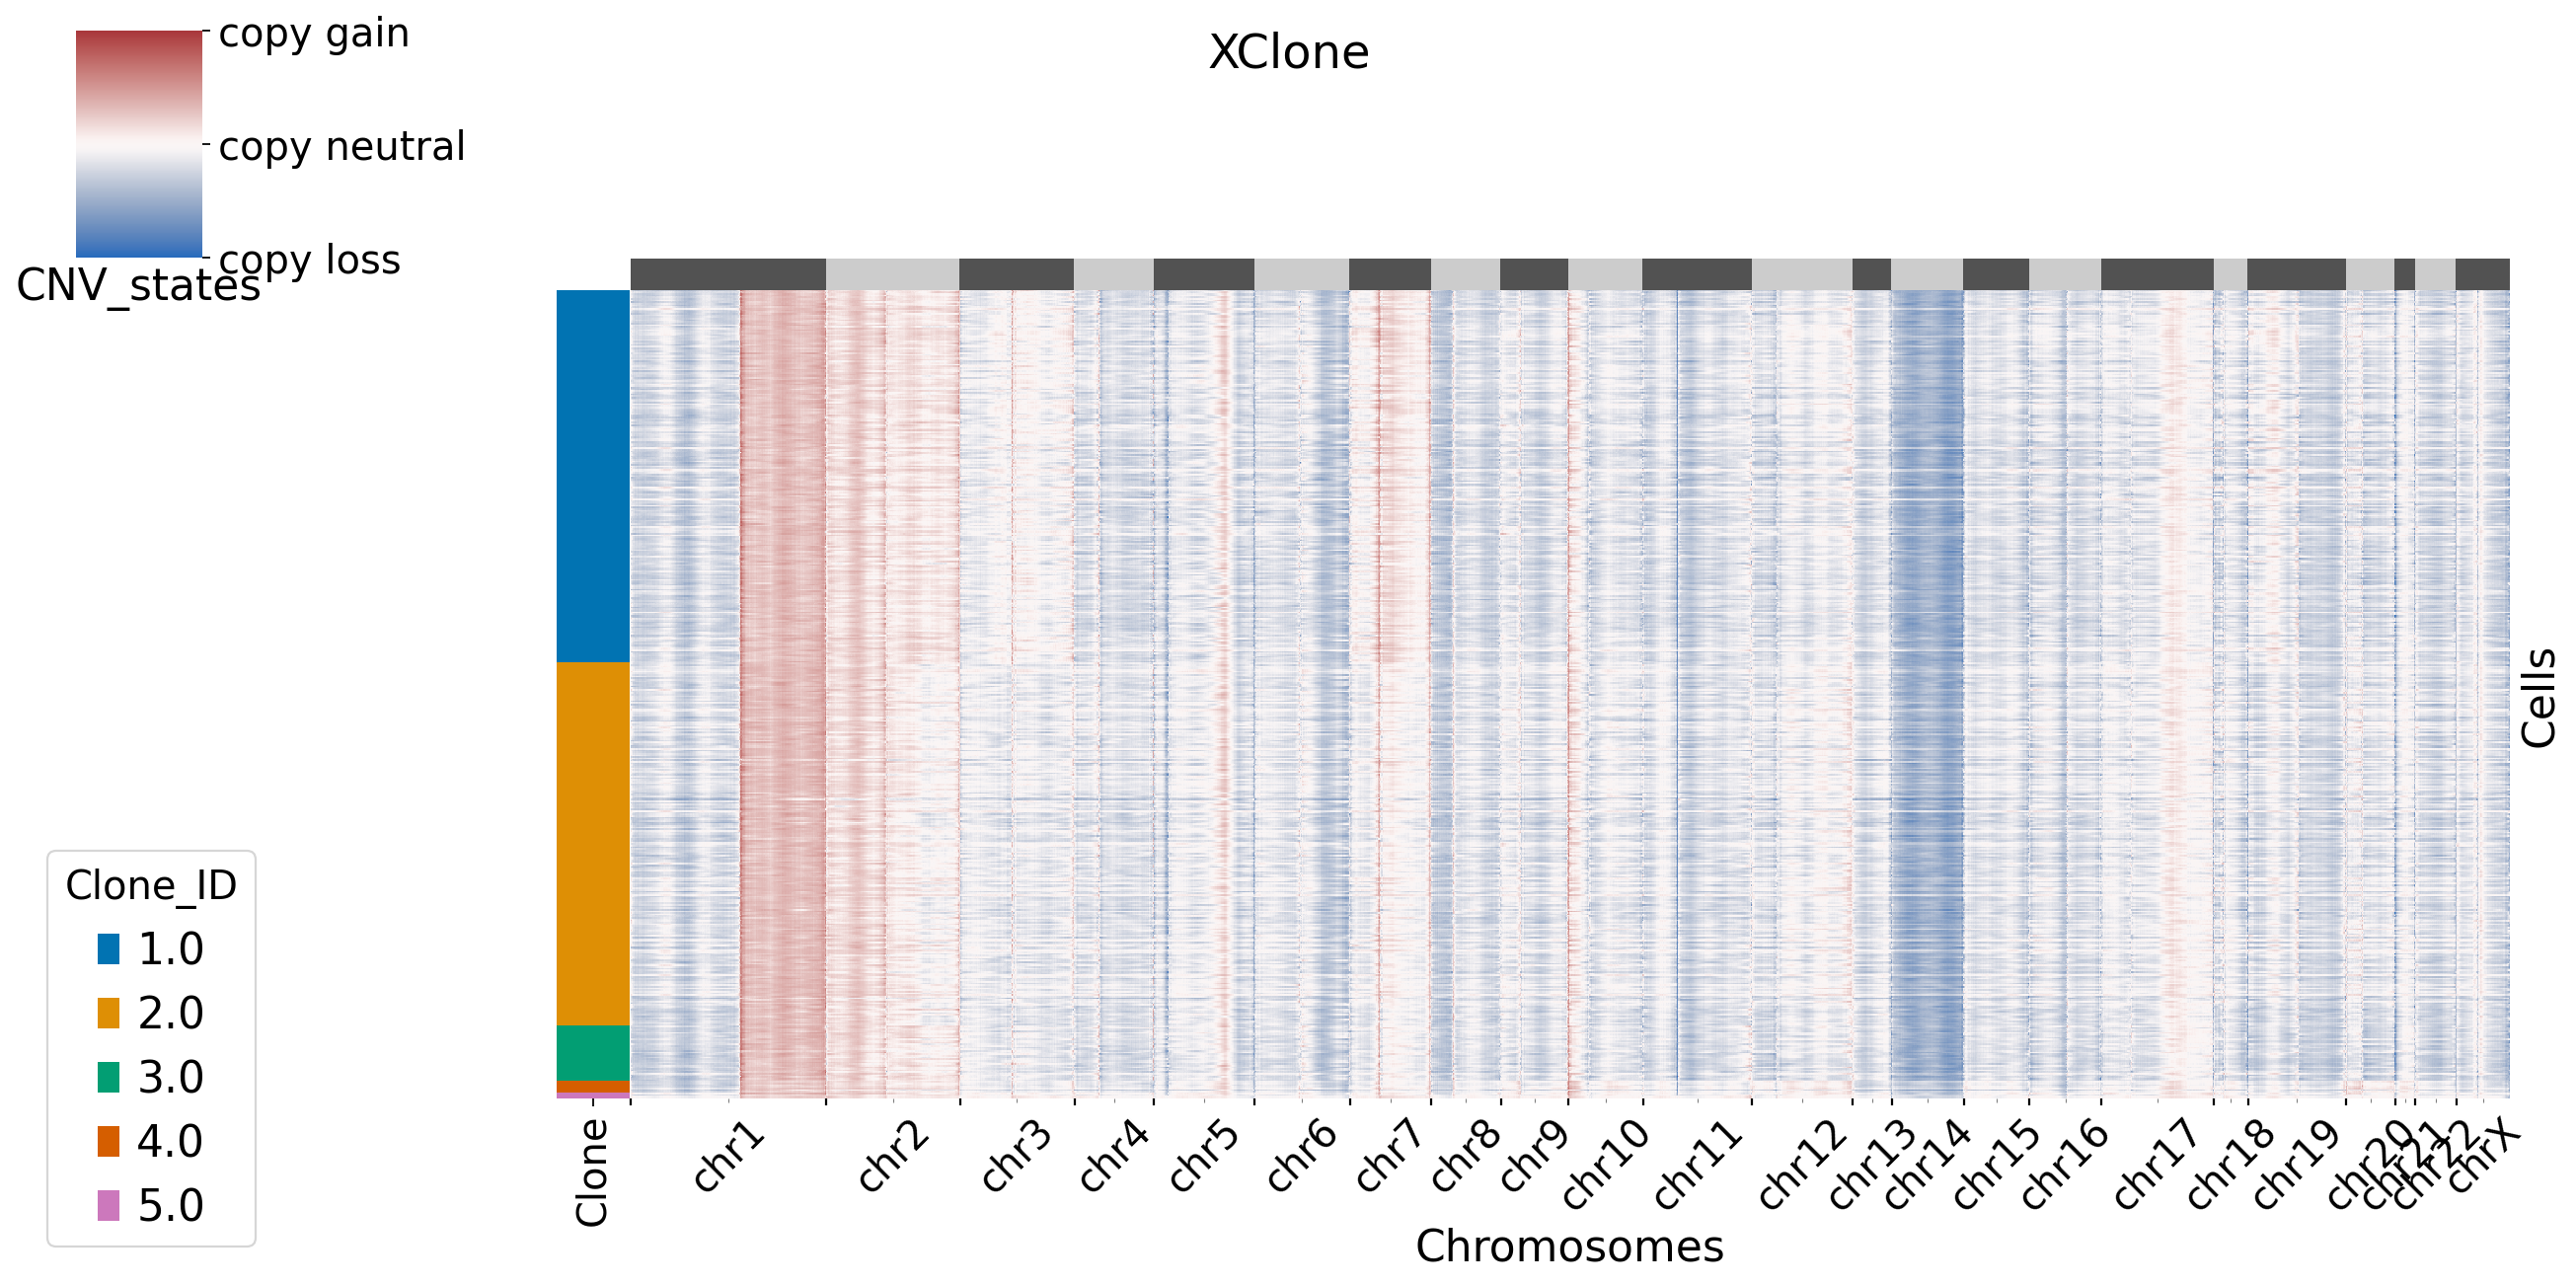

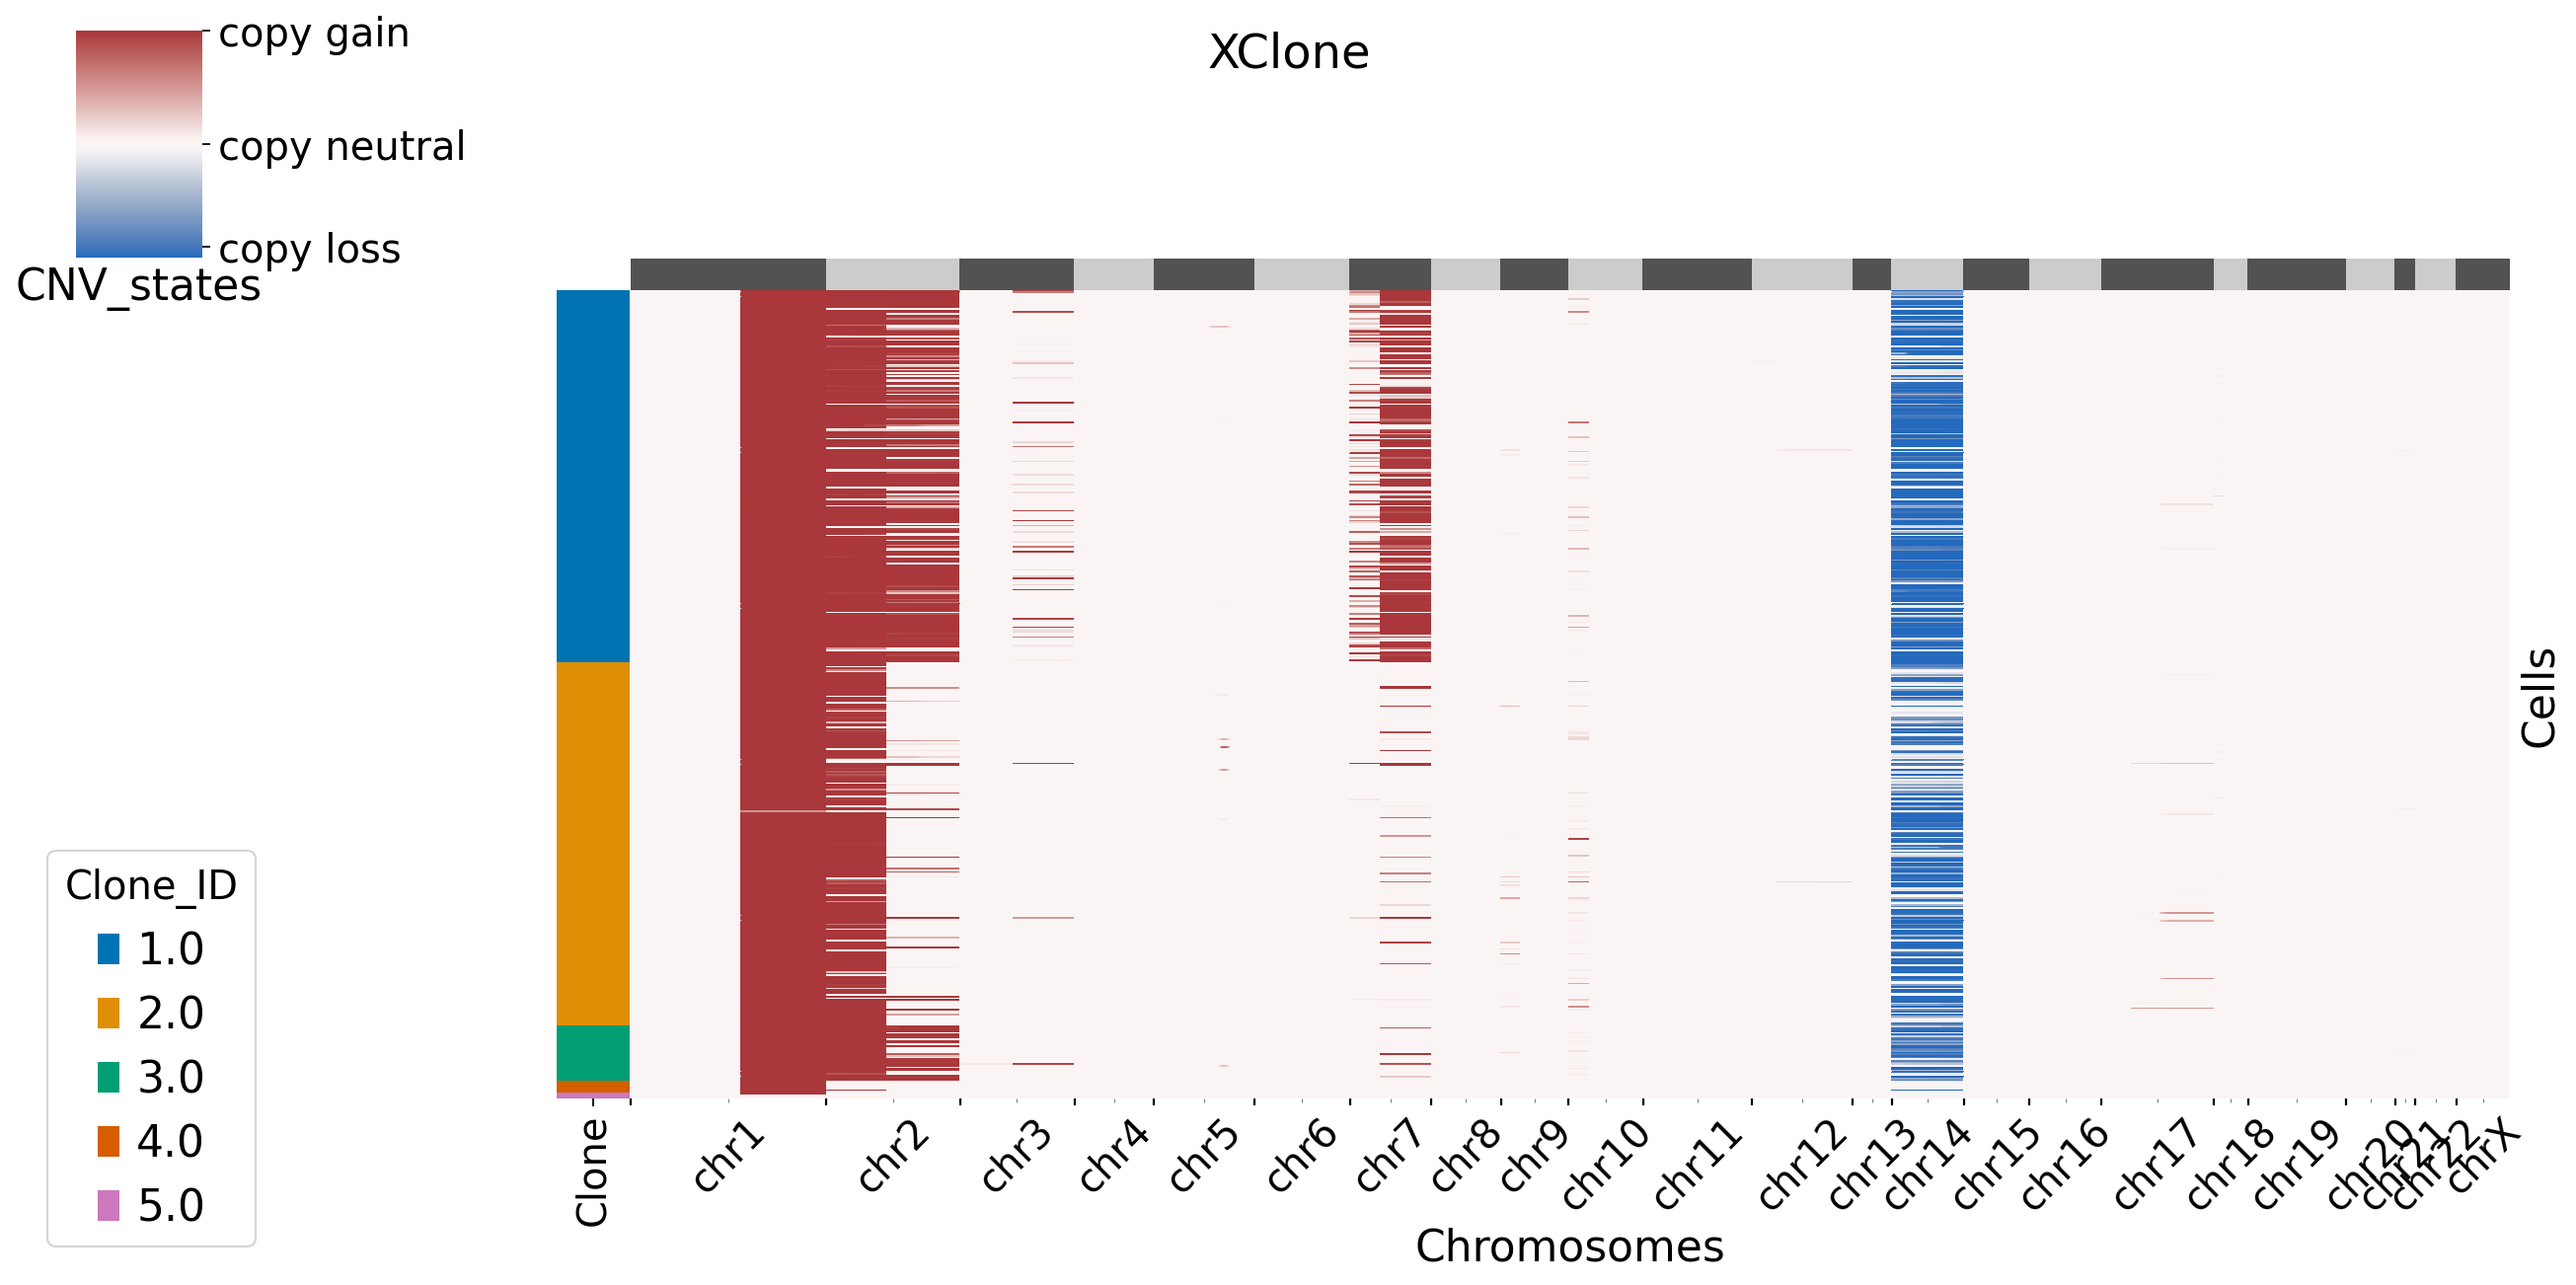

In [5]:
xconfig = xclone.XCloneConfig(dataset_name = "BCH869_scRNA", module = "RDR")
xconfig.set_figure_params(xclone= True, fontsize = 18)
xconfig.outdir = "/storage/yhhuang/users/rthuang/xclone/demo_wrap/BCH869_scRNA/"
xconfig.cell_anno_key = "cell_type"
xconfig.ref_celltype = "N"
xconfig.filter_ref_ave = 1.8,
xconfig.smart_transform = True
xconfig.top_n_marker = 20
xconfig.marker_group_anno_key = "Clone_ID"
xconfig.xclone_plot= True
xconfig.plot_cell_anno_key = "Clone_ID"


RDR_Xdata = xclone.model.run_RDR(RDR_adata,
            config_file = xconfig)

## BAF module

[XClone BAF module running]************************
[XClone data preprocessing] check BAF raw dataset value: success
Keep valid cells: Filter out 0 cells / 492 total cells, remain 492 valid cells with annotation
[XClone data preprocessing] check BAF cell annotation: success
[XClone data checking]: RDR and BAF in same cell order
[XClone-data removing]:
Filter out 100 genes / 32696 total genes, remain 32596 regions
[XClone-Local_phasing] time_used: 19.62seconds
[XClone-Global_phasing] time_used: 0.67seconds


... storing 'bin_stop_arm' as categorical
... storing 'bin_stop_chr_arm' as categorical
... storing 'bin_stop_band' as categorical


[XClone get_CNV_states] time_used: 8.73seconds
do clipping at ref BAF
states used: [[0.32864486 0.5        0.66866486]
 [0.32864486 0.5        0.66866486]
 [0.32864486 0.5        0.66866486]
 ...
 [0.32864486 0.5        0.66866486]
 [0.32864486 0.5        0.66866486]
 [0.32864486 0.5        0.66866486]]
[XClone] specific Center states used.
[XClone]: validated probability, all finite.
cal emm prob time 0 seconds
normalize the input emm_prob_log
normalized emm_prob_log
generate new layer key value: bin_phased_BAF_specific_center_emm_prob_log_KNN
[BAF smoothing] time_used: 0.04seconds
filter nan emm_prob
[XClone] multiprocessing for each brk item
nproc: 80
[XClone HMM smoothing] Time used: 3 seconds


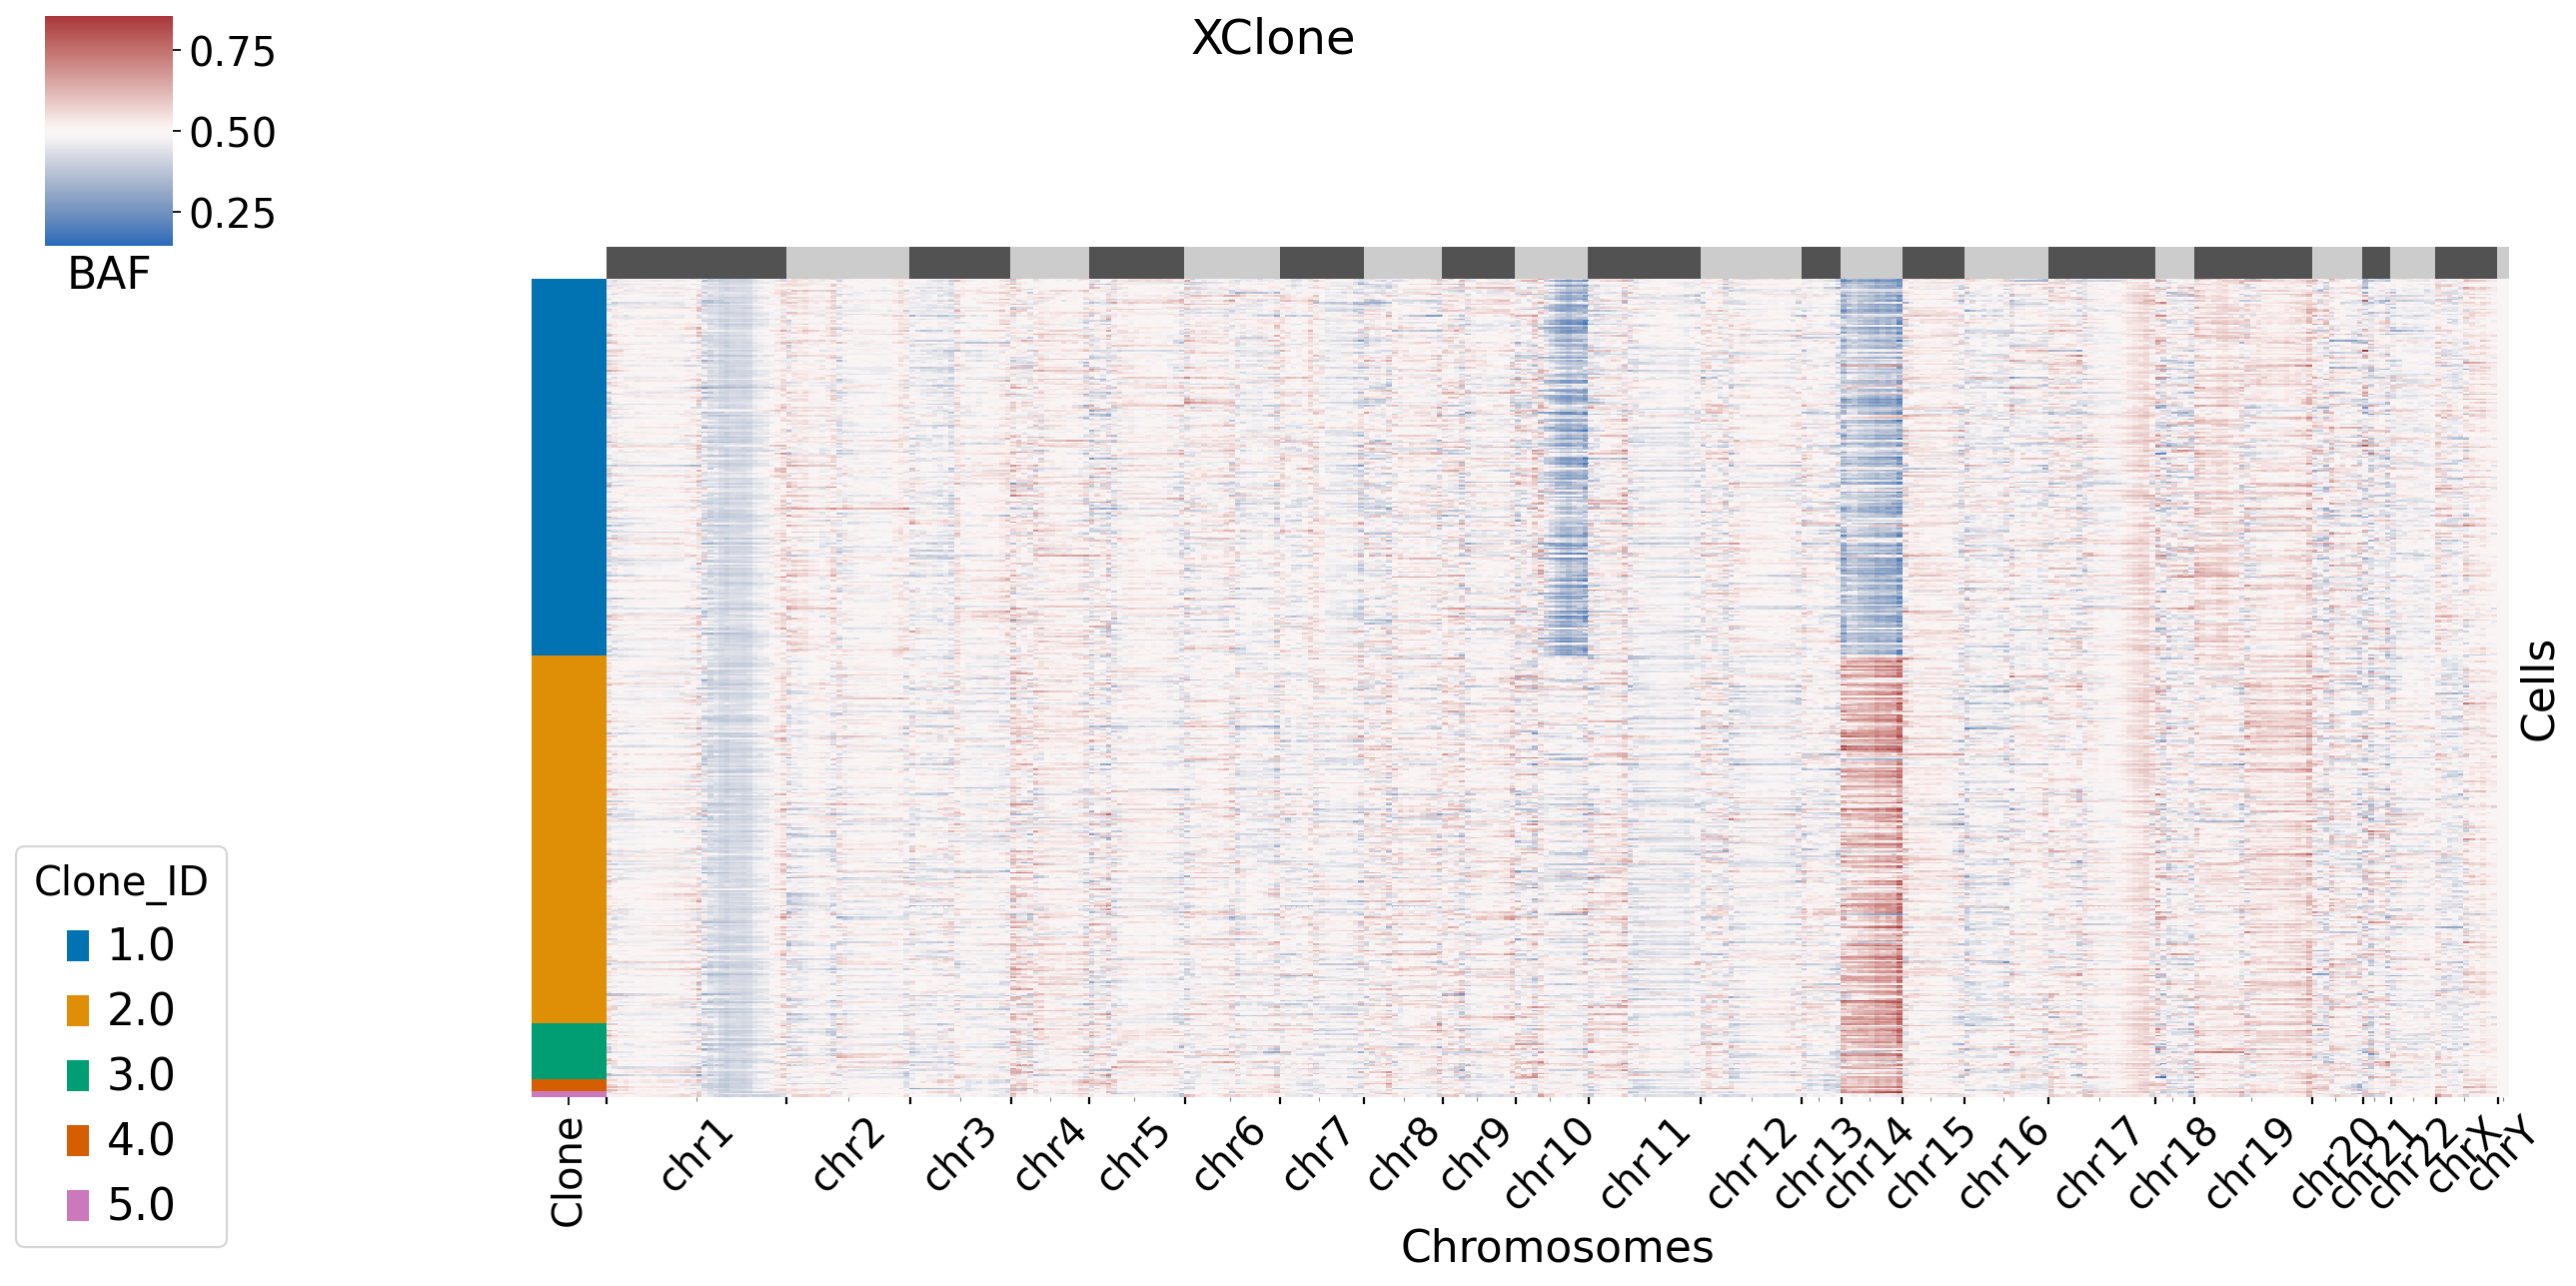

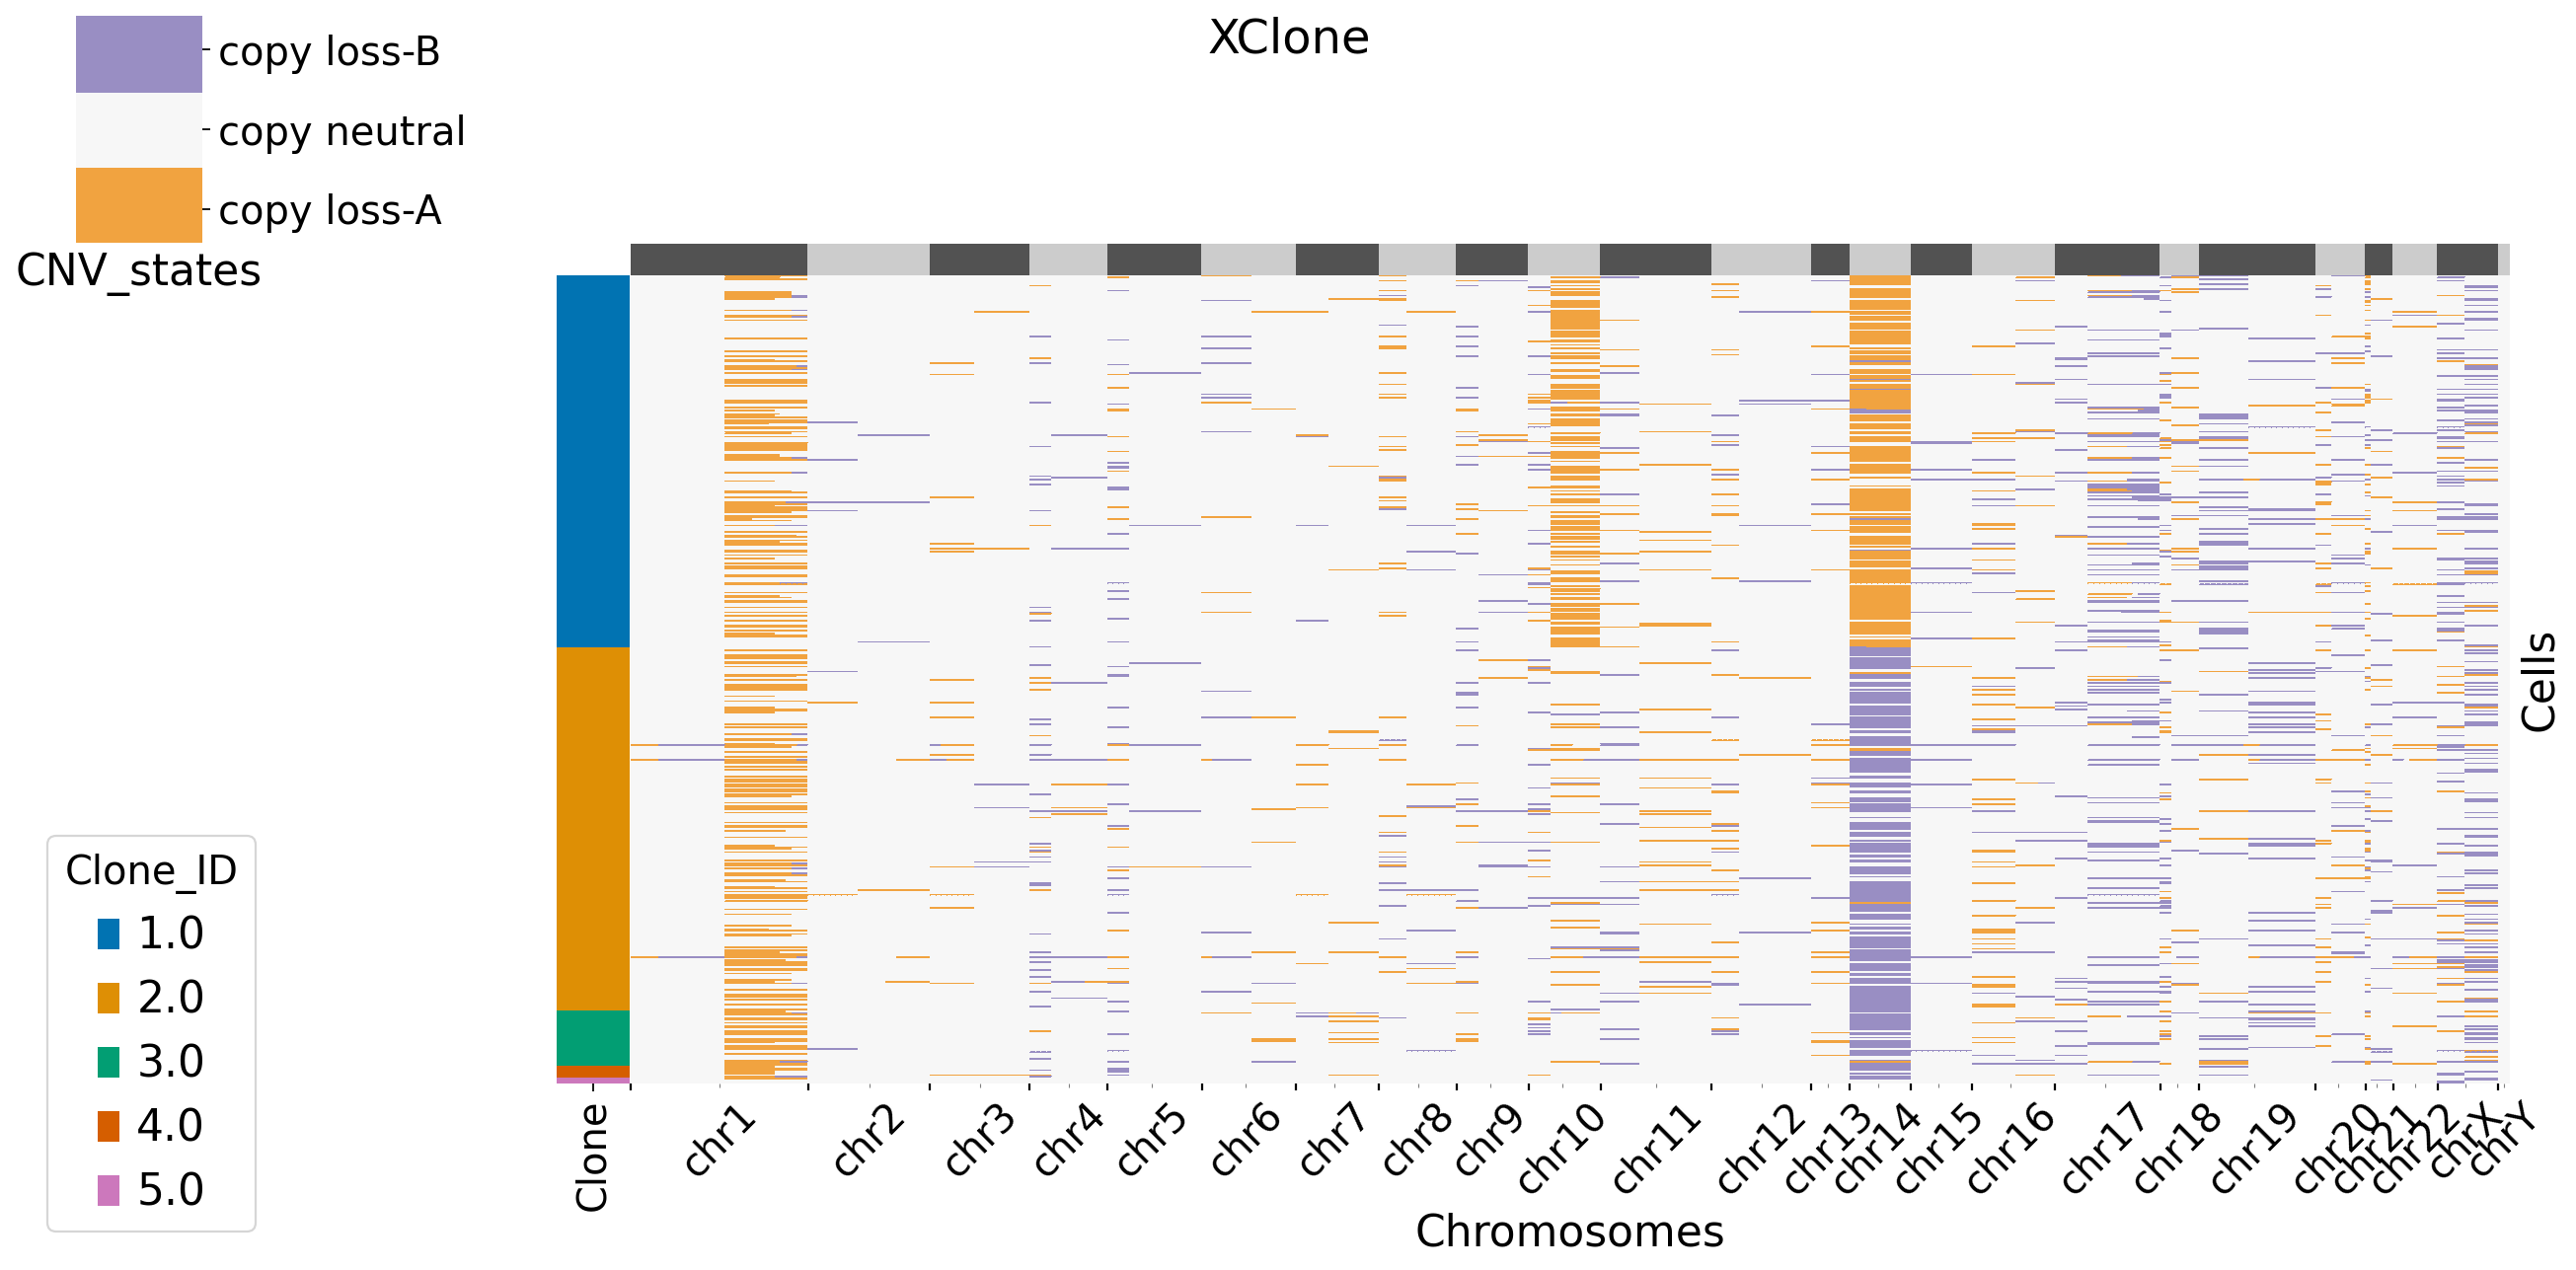

In [6]:
xconfig = xclone.XCloneConfig(dataset_name = "BCH869_scRNA", module = "BAF")
xconfig.set_figure_params(xclone= True, fontsize = 18)
xconfig.outdir = "/storage/yhhuang/users/rthuang/xclone/demo_wrap/BCH869_scRNA/"
xconfig.cell_anno_key = "cell_type"
xconfig.ref_celltype = "N"
xconfig.theo_neutral_BAF = 0.5
xconfig.start_prob = np.array([0.3, 0.4, 0.3])
xconfig.xclone_plot= True
xconfig.plot_cell_anno_key = "Clone_ID"

BAF_merge_Xdata = xclone.model.run_BAF(BAF_adata,
            config_file = xconfig)

## Combine module

[XClone Combination module running]************************
[XClone] BAF extend bins to genes.
[XClone data checking]: RDR and BAF in same cell order
No genes in this bin: 20698 20707 , skip this bin.
No genes in this bin: 31521 31522 , skip this bin.
No genes in this bin: 32584 32684 , skip this bin.
No genes in this bin: 32684 32784 , skip this bin.
[XClone plotting]


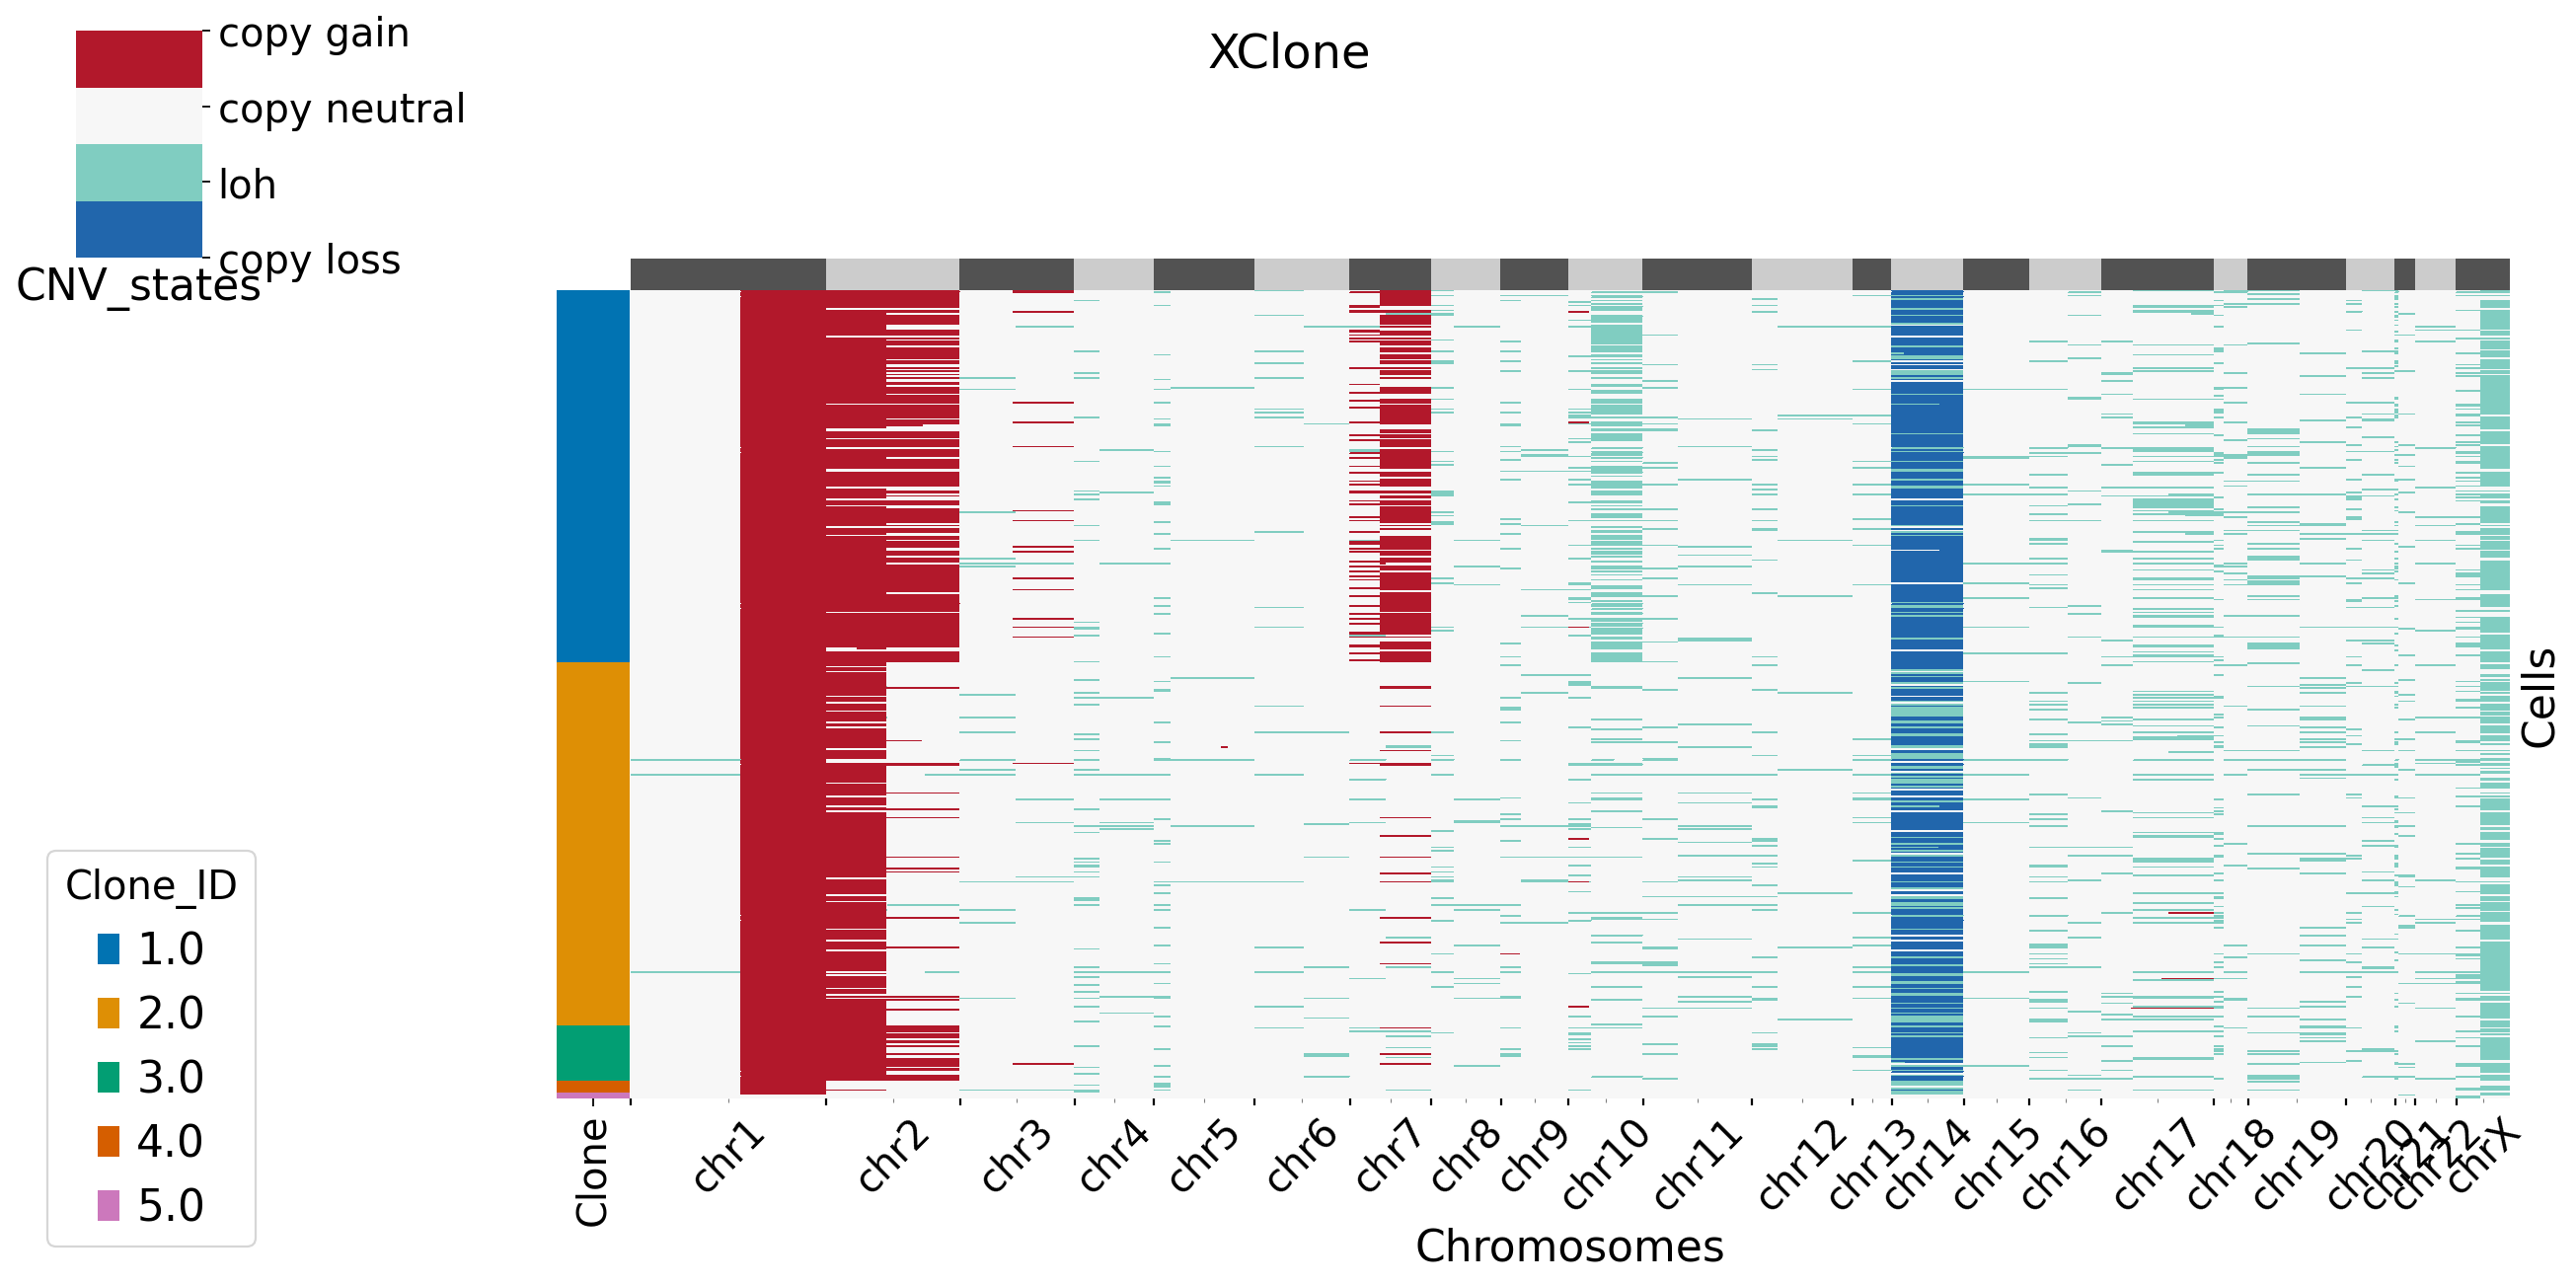

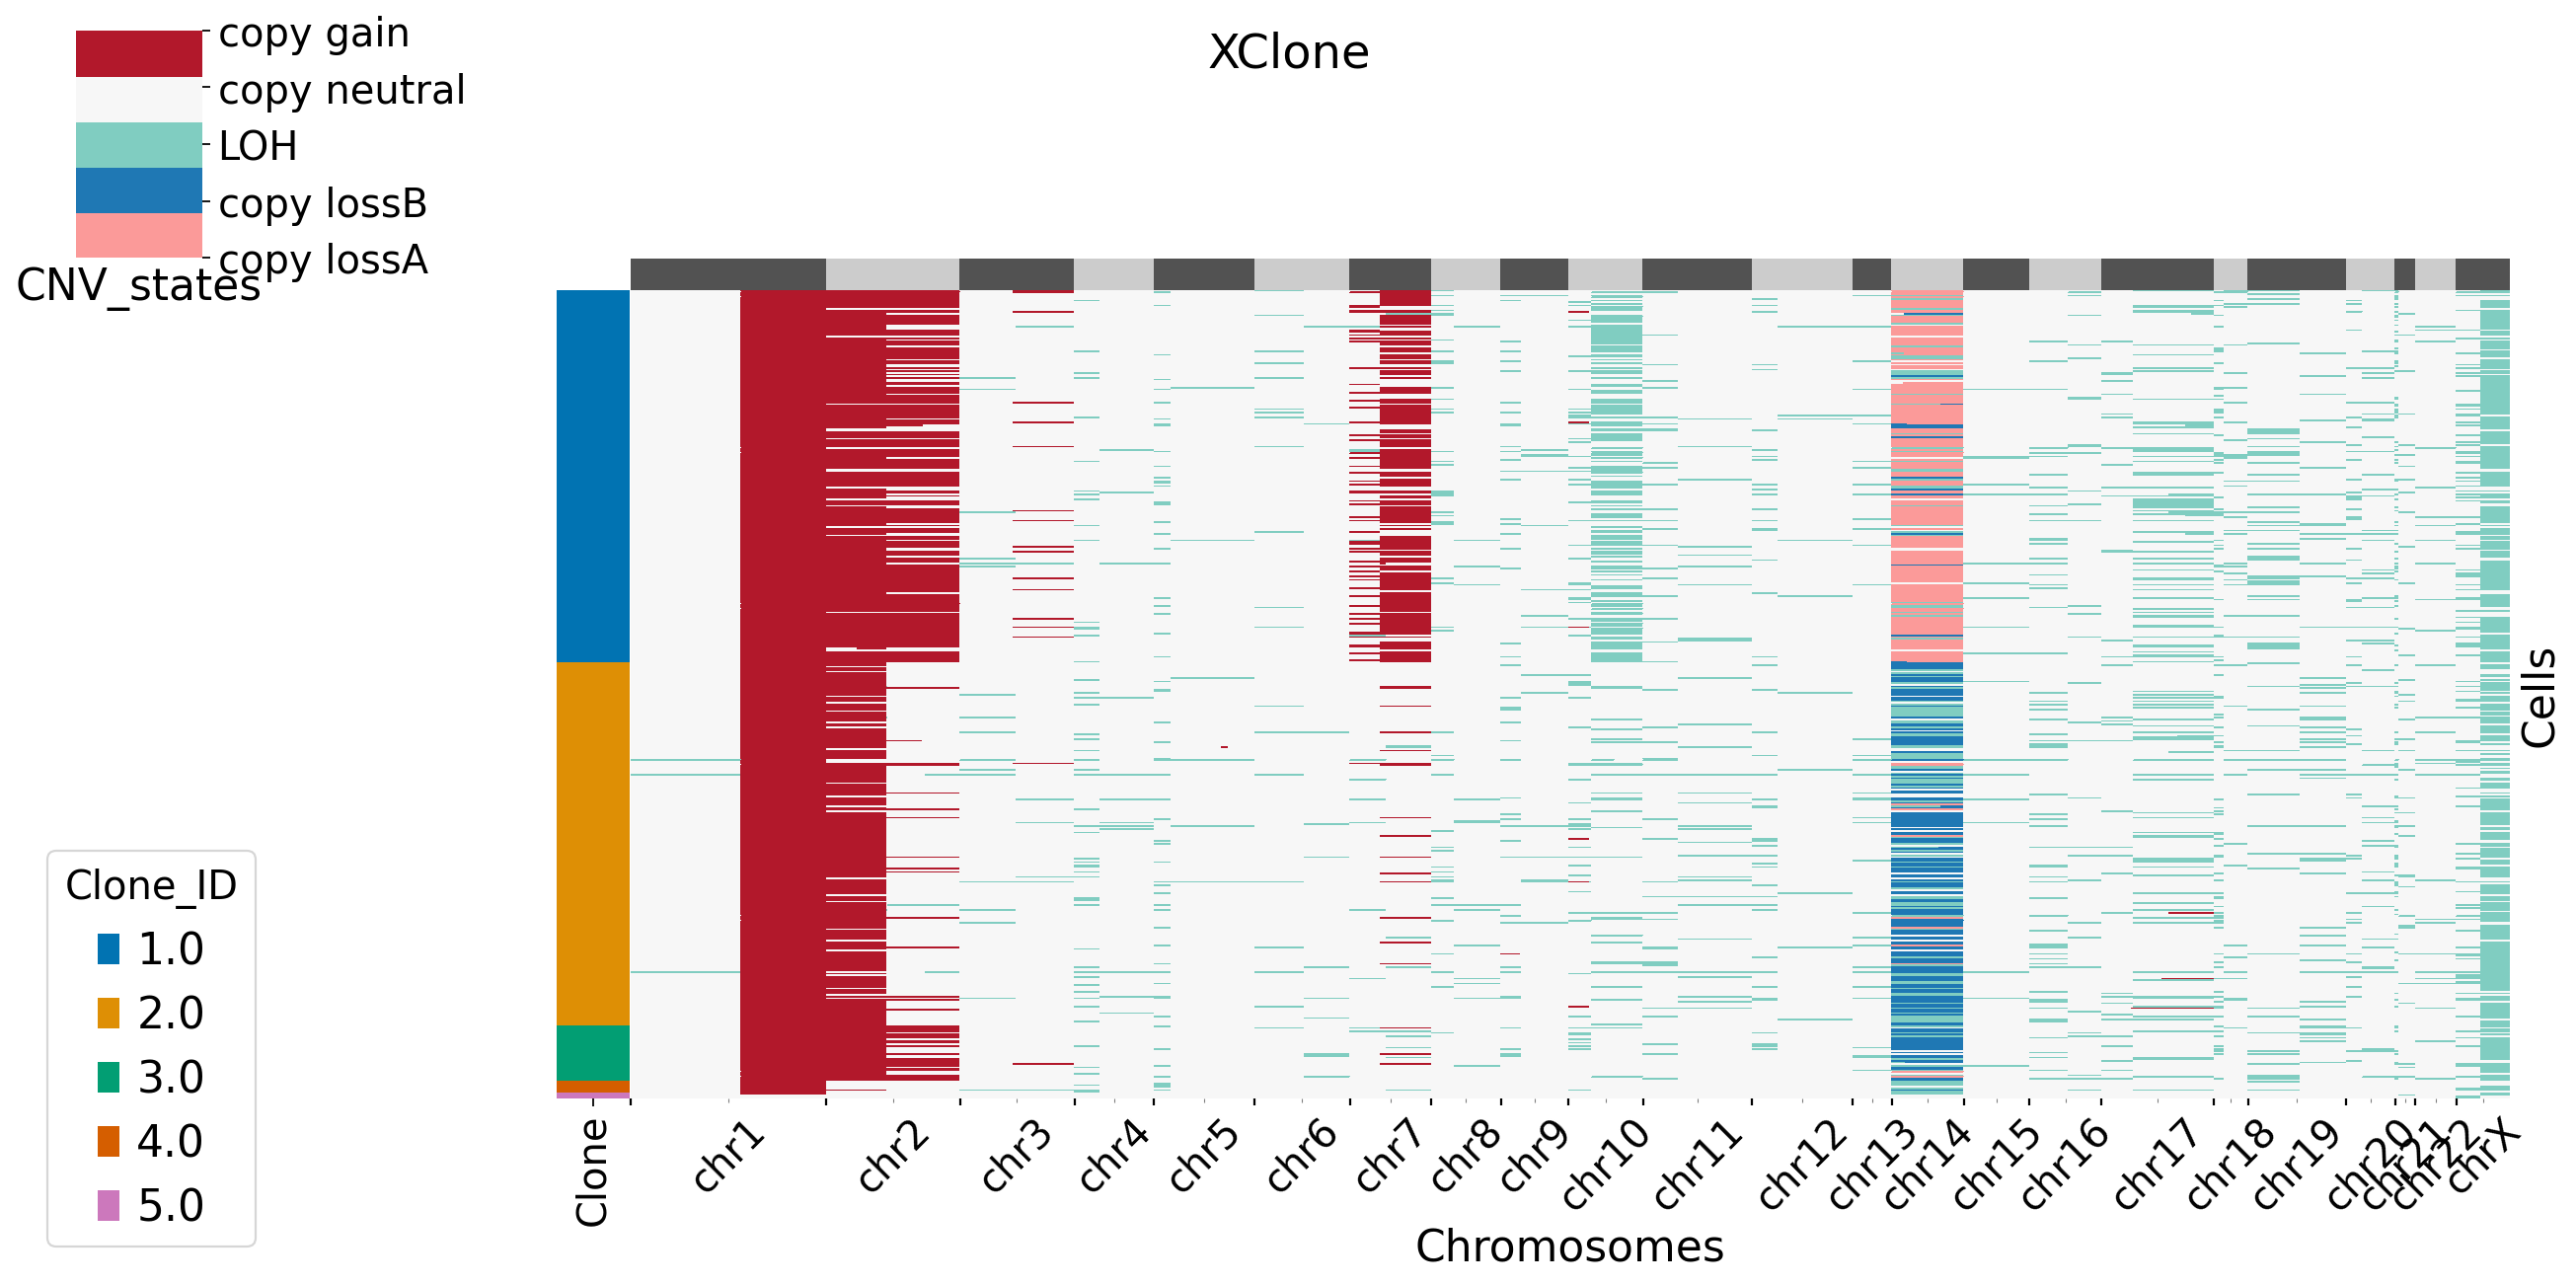

In [19]:
xconfig = xclone.XCloneConfig(dataset_name = "BCH869_scRNA", module = "Combine")
xconfig.set_figure_params(xclone= True, fontsize = 18)
xconfig.outdir = "/storage/yhhuang/users/rthuang/xclone/demo_wrap/BCH869_scRNA/"

xconfig.cell_anno_key = "cell_type"
xconfig.ref_celltype = "N"

xconfig.xclone_plot= True
xconfig.plot_cell_anno_key = "Clone_ID"
xconfig.merge_loss = False
xconfig.merge_loh = True

combine_Xdata = xclone.model.run_combine(RDR_Xdata,
                BAF_merge_Xdata,
                verbose = True,
                run_verbose = True,
                config_file = xconfig)

In [9]:
combine_Xdata

AnnData object with n_obs × n_vars = 492 × 5337
    obs: 'Sample', 'GenesExpressed', 'HousekeepingGeneExpression', 'Type', 'Cellcycle', 'OPC-variable', 'OC-like', 'AC-like', 'OPC-like', 'Clone_ID', 'cell_type', 'library_ratio', 'library_alpha', 'sample_chr_total', 'ref_chr_total', 'sample_chr_total_normalization', 'library_ratio_capped', 'counts_ratio'
    var: 'GeneName', 'GeneID', 'chr', 'start', 'stop', 'arm', 'chr_arm', 'band', 'ref_avg', 'dispersion', 'gene_dispersion_bse', 'dispersion_capped', 'gene_index'
    uns: 'data_mode', 'data_notes', 'genome_mode', 'log', 'rank_marker_genes', 'fit_dispersion_removed_genes', 'dispersion_base_celltype', 'pca', 'neighbors', 'sort_chr_dict', 'guide_CNV_chrs_use_layers', 'guide_CNV_chrs_use_anno_key', 'ref_log_expression_brk', 'group_genes', 'CNV_ratio', 'Logliklihood'
    obsm: 'select_chr_index', 'X_pca'
    varm: 'PCs'
    layers: 'raw_expr', 'raw_ratio', 'ref_normalized', 'expected', 'WMA_smoothed', 'RDR_smooth', 'emm_prob_log', 'emm_prob_